In [266]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection as ms
from sklearn import metrics
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.neural_network import MLPClassifier as MLP
import sklearn.preprocessing as pp
import sklearn.feature_selection as fs
import sklearn.cluster as ct
import sklearn.mixture as mx
import sklearn.decomposition as dec
from kneed import KneeLocator
import helpers
sns.set()
%matplotlib inline
import importlib
importlib.reload(helpers)
import time
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## MADELON

In [229]:
X_train = pd.read_hdf('data/madelon/madelon.hdf', 'X_train')
y_train = pd.read_hdf('data/madelon/madelon.hdf', 'y_train')
X_scaled = pp.scale(X_train)

In [230]:
def fit_pca(X, n_components=None):
    pca = dec.PCA(n_components=n_components)
    transformed = pca.fit(X).transform(X)
    return transformed, pca

In [231]:
def plot_pca_components_var(pca, thresh=0.9):
    var_ratio_cum = np.cumsum(pca.explained_variance_ratio_)
    var_data = pd.DataFrame({"variance pct": var_ratio_cum, "n components": np.arange(1, pca.n_components_ + 1)})
    optimal_components = var_data[var_data['variance pct'] > thresh].iloc[0]['n components']
    print("Optimal number of components", optimal_components)
    sns.lineplot(x='n components', y='variance pct', data=var_data)
    plt.vlines(optimal_components, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
    plt.title('variance % explained by components')

Optimal number of components 226.0


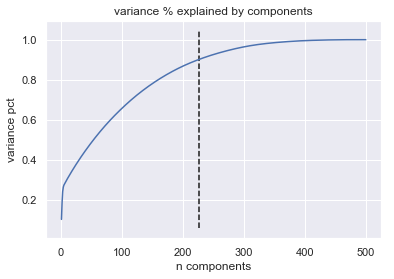

In [232]:
transfomed, pca = fit_pca(X_train)
plot_pca_components_var(pca)

In [233]:
def plot_pca_components(X, y, c1=0, c2=1):
    data = pd.DataFrame(X)
    data['class'] = y
    sns.relplot(x=c1, y=c2, hue='class', data=data)
    plt.title('PCA components %d and %d' % (c1, c2))

In [234]:
def pca_fit_and_plot(X, y, n_components, c1=0, c2=1):
    transformed, pca = fit_pca(X, n_components)
    plot_pca_components(transformed, y, c1=c1, c2=c2)
    return transformed, pca

(array([[-3.41707297e+01,  1.08228037e+02,  3.15192468e+02, ...,
         -9.77642171e+00,  6.40823786e+00, -1.99093352e+01],
        [ 2.62812445e+01,  1.75408716e+02,  1.89220746e+02, ...,
          1.04685972e+01, -1.66583932e+01,  1.62094714e+01],
        [-1.86789838e+02,  3.15412755e+02,  2.31648130e+02, ...,
          1.35882216e+01, -1.68436050e+01, -5.65484775e+00],
        ...,
        [-5.40828047e+01,  3.54057007e+02,  8.23392951e+01, ...,
         -1.00139872e+01,  4.53772452e+00,  1.41602091e+01],
        [-2.18800652e+02, -1.44687712e+02, -1.28566500e+02, ...,
         -2.31444404e+01, -5.54410048e+00,  2.46052966e+01],
        [ 2.59076127e+02,  4.39128007e+01,  1.12680821e+02, ...,
          4.29647733e+01,  3.07869563e-01,  1.70554385e+01]]),
 PCA(copy=True, iterated_power='auto', n_components=226, random_state=None,
   svd_solver='auto', tol=0.0, whiten=False))

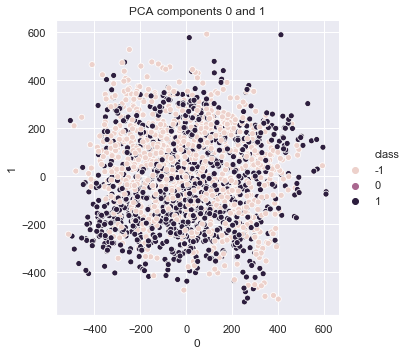

In [235]:
pca_fit_and_plot(X_train, y_train.values.ravel(), 226)

In [237]:
madProjected, madPca = fit_pca(X_train.values, 226)

In [238]:
madRestored = madPca.inverse_transform(madProjected)
madRestoredMSE = ((X_train.values - madRestored) ** 2).mean()
madRestoredMSE

91.07381078818096

In [239]:
X_orig = pd.DataFrame(X_train.values)
X_restored = pd.DataFrame(madRestored)

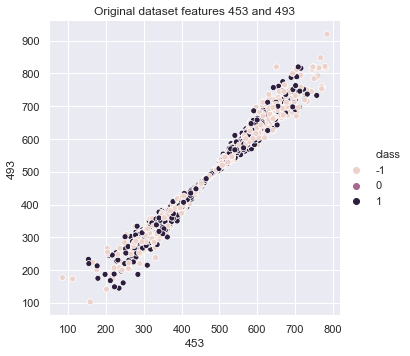

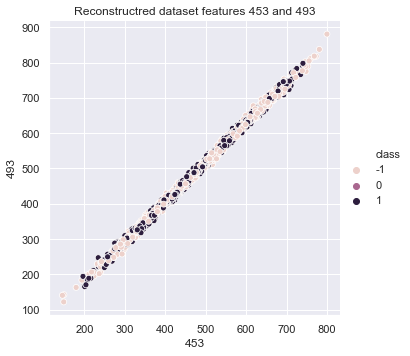

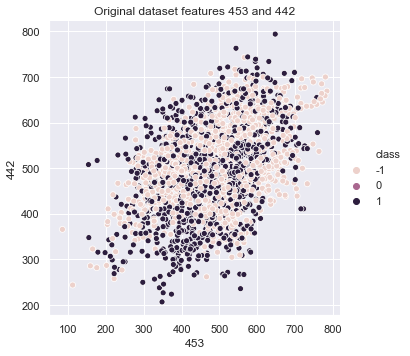

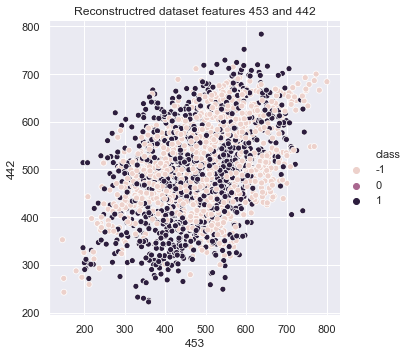

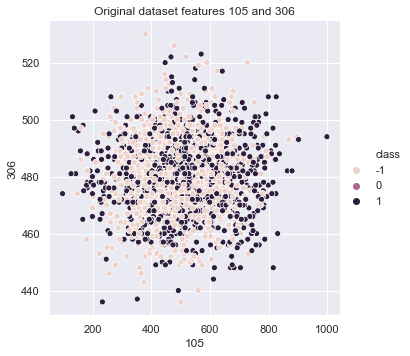

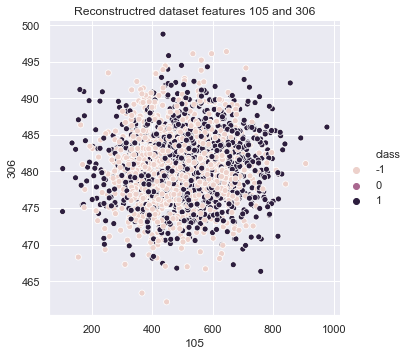

In [240]:
importlib.reload(helpers)
helpers.plot_reconstructed(X_train.values, madRestored, y_train.values, 453, 493)
helpers.plot_reconstructed(X_train.values, madRestored, y_train.values, 453, 442)
helpers.plot_reconstructed(X_train.values, madRestored, y_train.values, 105, 306)

### KMeans Clustering

In [248]:
importlib.reload(helpers)
start = time.time()
results = helpers.get_kmeans_scores(madProjected, ks=np.arange(1, 25))
stop = time.time()
print("Took", stop-start, "s")

Took 13.07256293296814 s


Knee 6


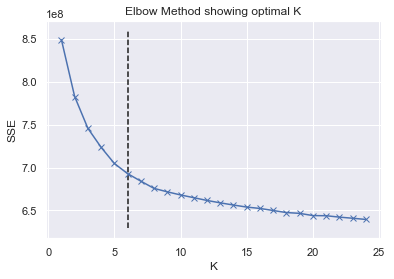

In [250]:
importlib.reload(helpers)
helpers.plot_elbow_curve(results['k'], results['score'], xlabel='K')

Features [0, 1, 2, 3, 4, 0, 1, 2, 4, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 4, 0, 1, 2, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 25, 0, 1, 2, 3, 4, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3]
Unique features [0, 1, 2, 3, 4, 25]


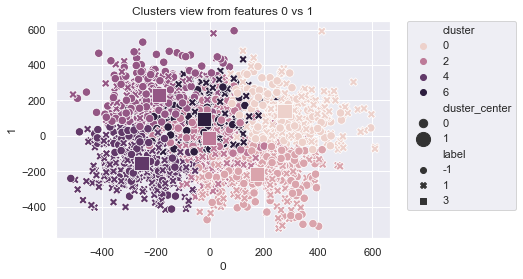

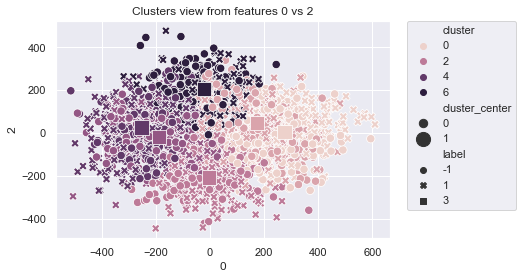

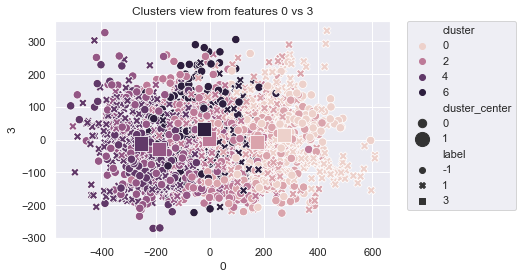

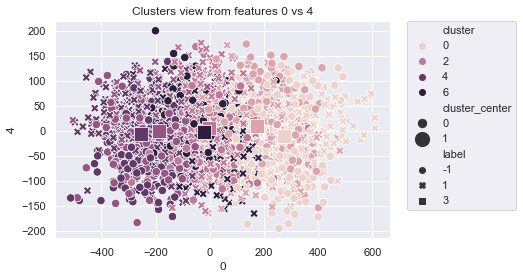

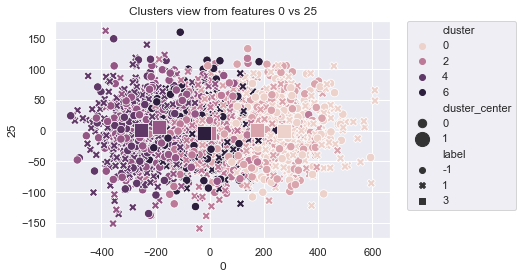

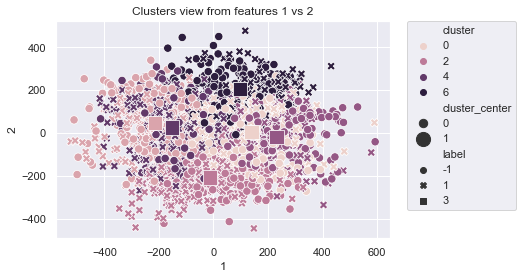

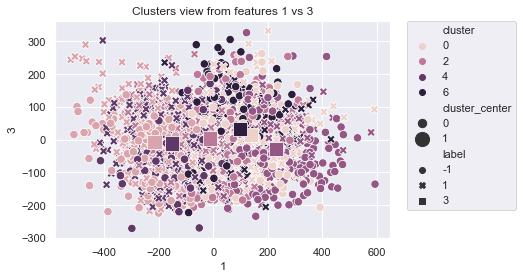

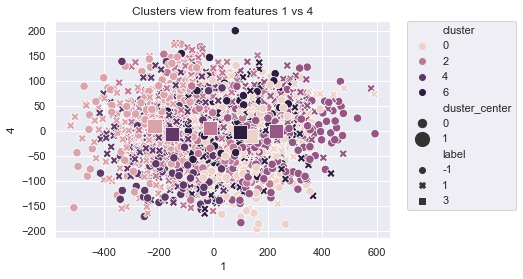

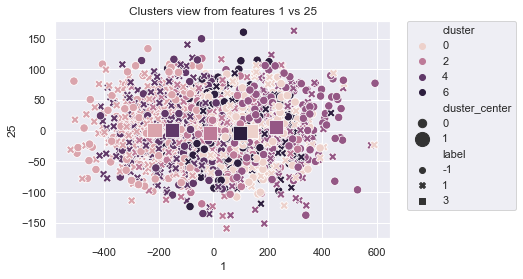

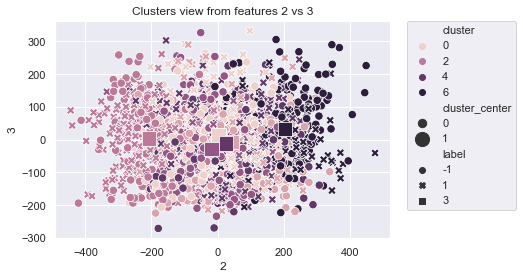

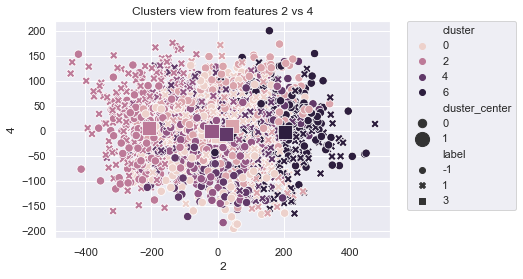

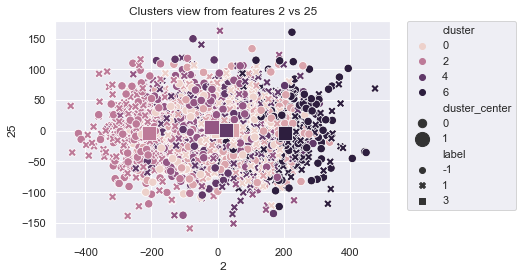

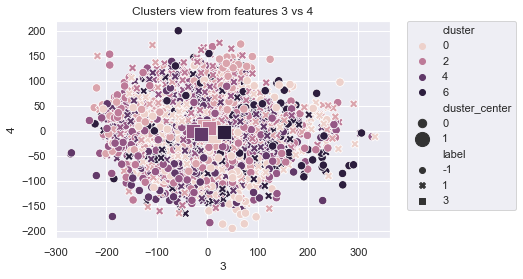

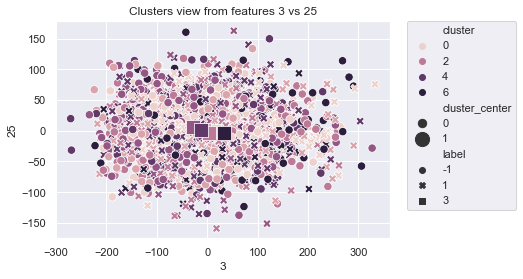

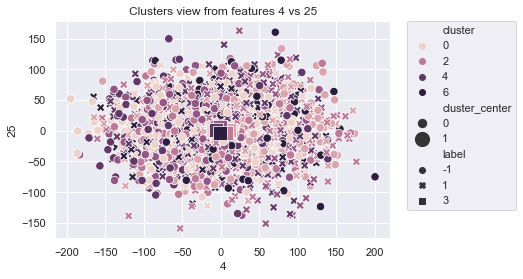

   cluster  negative  positive  pos_over_neg  total   pct_neg   pct_pos  \
0        0       197       150      0.761421    347  0.187085  0.146056   
1        1       196       184      0.938776    380  0.186135  0.179163   
2        2       168       218      1.297619    386  0.159544  0.212269   
3        3       196       106      0.540816    302  0.186135  0.103213   
4        4       133       251      1.887218    384  0.126306  0.244401   
5        5       163       118      0.723926    281  0.154796  0.114898   

   pct_total  
0   0.166827  
1   0.182692  
2   0.185577  
3   0.145192  
4   0.184615  
5   0.135096  


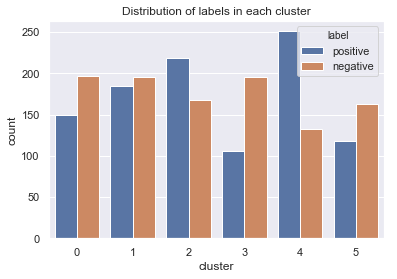

In [256]:
helpers.kmeans_experiment(pd.DataFrame(madProjected), pd.DataFrame(y_train.values), 6, thresh=10)

Features [19, 82, 110, 182, 33]
Unique features [19, 33, 82, 110, 182]


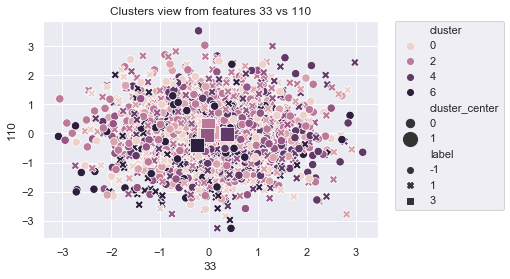

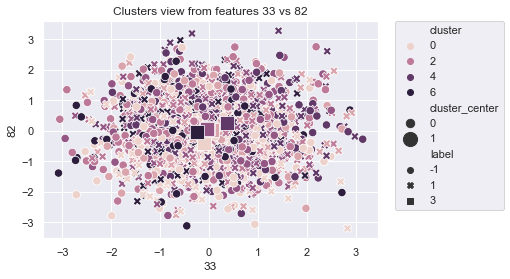

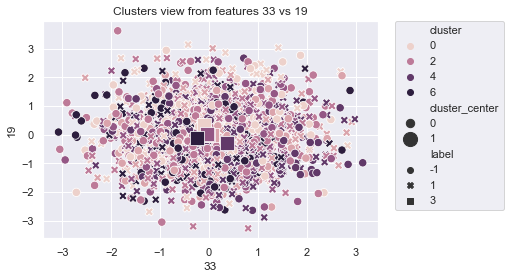

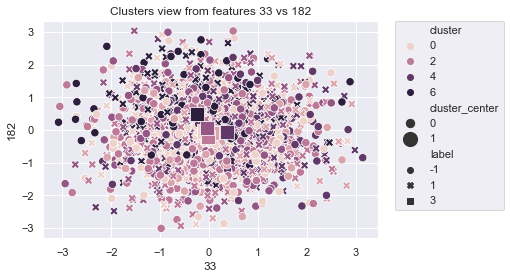

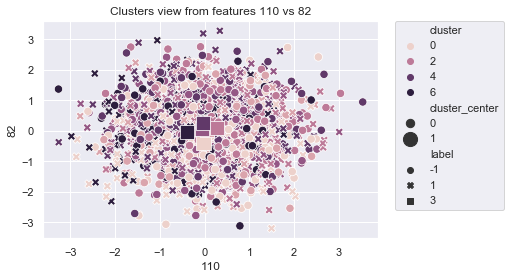

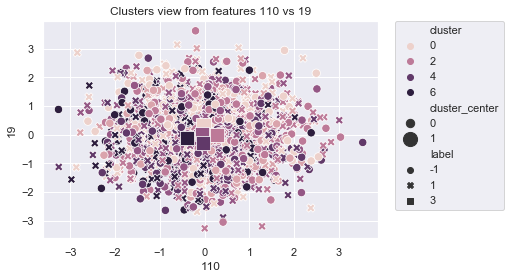

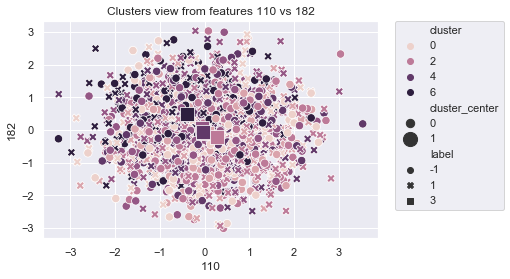

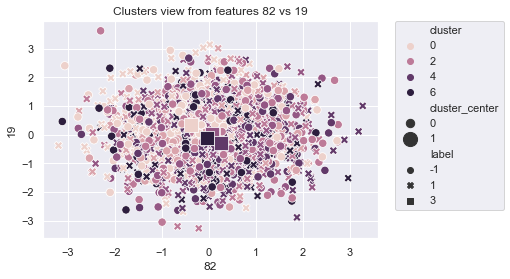

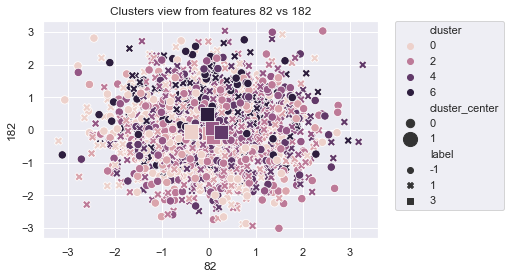

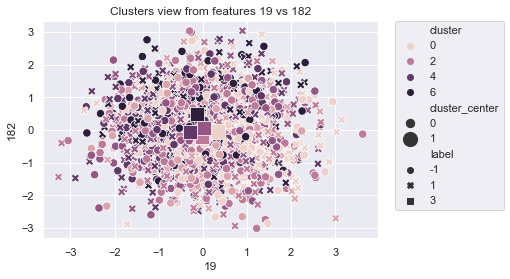

   cluster  negative  positive  pos_over_neg  total   pct_neg   pct_pos  \
0        0       175       182      1.040000    357  0.166192  0.177215   
1        1       155       146      0.941935    301  0.147198  0.142162   
2        2       237       222      0.936709    459  0.225071  0.216164   
3        3       187       197      1.053476    384  0.177588  0.191821   
4        4       167       153      0.916168    320  0.158594  0.148978   
5        5       132       127      0.962121    259  0.125356  0.123661   

   pct_total  
0   0.171635  
1   0.144712  
2   0.220673  
3   0.184615  
4   0.153846  
5   0.124519  


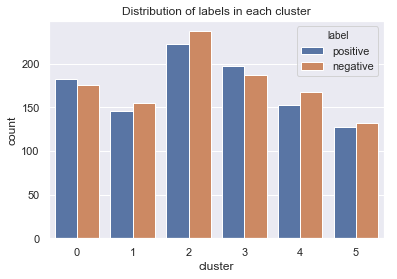

In [264]:
madProjectedScaled = pp.scale(madProjected)
helpers.kmeans_experiment(pd.DataFrame(madProjectedScaled), pd.DataFrame(y_train.values), 6, thresh=0.6)

### Neural network on projected data

In [269]:
basicClf = make_pipeline(
#     fs.SelectFromModel(RFC(), threshold='median'),
#     fs.SelectFromModel(RFC(), threshold='median'),
#     fs.SelectFromModel(RFC(), threshold='median'),
#     fs.SelectFromModel(RFC(), threshold='median'),
#     fs.SelectFromModel(RFC(), threshold='median'),
#     fs.SelectKBest(fs.chi2, k=2),
    pp.StandardScaler(),
    MLP(activation='tanh', solver='sgd', 
       learning_rate_init=0.01,
       learning_rate='constant',
       max_iter=2000,
       alpha=0.01,
       hidden_layer_sizes=(20, 15))
)
%timeit -r3 -n1 basicClf.fit(madProjected, y_train.values.ravel())

884 ms ± 41.5 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)


In [288]:
ms.cross_val_score(basicClf, madProjected[:, :5], y_train.values.ravel()).mean()

0.8793305637686041

In [297]:
# use only 5 features
%timeit -r3 -n1 basicClf.fit(madProjected[:, :5], y_train.values.ravel())

935 ms ± 310 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)


In [301]:
%timeit -r3 -n1 mady_pred_train = basicClf.predict(madProjected[:, :5])
metrics.accuracy_score(y_train, mady_pred_train)

3.5 ms ± 1.09 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)


0.9076923076923077

### Evaluating on PCA-reduced NN on test data

In [302]:
madX_test = pd.read_hdf('data/madelon/madelon.hdf', 'X_test')
mady_test = pd.read_hdf('data/madelon/madelon.hdf', 'y_test')
madProjected_test = madPca.transform(madX_test)

In [308]:
mady_pred = basicClf.predict(madProjected_test[:, :5])

In [314]:
metrics.accuracy_score(mady_test.values.ravel(), mady_pred)

0.85

### Neural network on clustered data

In [316]:
madKmeans = ct.KMeans(n_clusters=6, random_state=1)
madKmeans.fit(madProjected)
madClusters_train = madKmeans.predict(madProjected)

In [320]:
madProjectedCluster = pd.DataFrame(madProjected)
madProjectedCluster['cluster'] = madClusters_train
madProjectedCluster.head()

0           1           2           3          4          5  \
0  -34.170730  108.228037  315.192468  102.313787  48.515991  90.377345   
1   26.281244  175.408716  189.220746  128.710618  20.441038 -28.126612   
2 -186.789838  315.412755  231.648130   32.557123  48.076365 -35.362271   
3 -227.738721  209.601532 -113.525738 -118.744643 -99.236549  80.549424   
4  -60.535549 -110.517470   75.779068  129.649800  -0.326856 -21.749611   

           6          7          8           9   ...           217        218  \
0  38.787128 -13.779576 -47.219338  -79.291305   ...      7.502811 -22.517032   
1  52.067160  39.044662  72.077599   51.380336   ...     -3.198704 -16.785417   
2  42.331576 -28.113650 -45.922355   52.231682   ...    -55.355176 -45.963612   
3 -64.439788 -44.843999  44.231773 -117.953007   ...     -9.837264 -22.566572   
4   1.006992  21.704459  15.286344  -39.017343   ...    -13.847740  19.839594   

         219        220        221        222        223        224  \
0 -31.539193   3.281823 -14.031212 -22.036204  16.207589  36.313248   
1  -7.364539  43.033278 -27.444704  -3.570039 -35.296939   1.340118   
2   7.091773   6.026635   1.740168   4.174472  -2.370600 -11.934204   
3  32.254347 -46.814101  11.830857  14.421014  -7.001492  22.632769   
4 -51.865916 -14.613085 -37.458158 -16.141362  12.627807  37.234497   

         225  cluster  
0  10.235513        5  
1  11.795206        5  
2 -18.478840        2  
3  18.156923        2  
4 -35.548464        3  

[5 rows x 227 columns]

## TELCO

In [127]:
telX_train = pd.read_hdf('data/telco/telco.hdf', 'X_train')
tely_train = pd.read_hdf('data/telco/telco.hdf', 'y_train')
telX_scaled = pp.scale(telX_train)

Optimal number of components 16.0


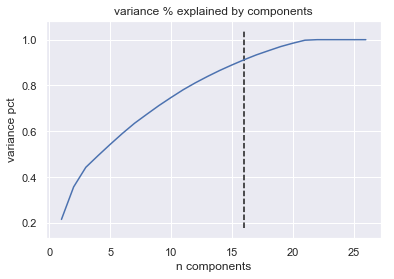

In [160]:
transformed, pca = fit_pca(telX_scaled)
plot_pca_components_var(pca)

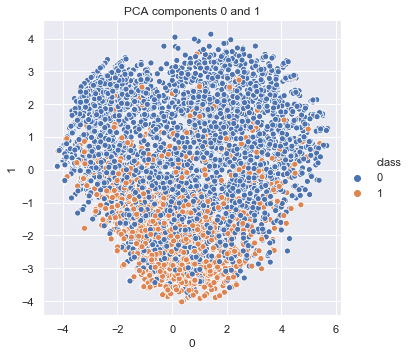

In [161]:
transformed, pca = pca_fit_and_plot(telX_scaled, tely_train.values.ravel(), 16)